In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1- load data and train test split

In [43]:
bankruptcy = pd.read_csv("/Users/brandonk87/Downloads/MSC 641/Boosting/bankruptcy-1.csv")
bankruptcy = bankruptcy.iloc[:, [1,3,4,5,6,7,8,9,10,11,12]]
bankruptcy.head()

,DLRSN,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10
0,0,0.307139,0.887006,1.647681,-0.199158,1.092964,-0.313289,-0.196793,1.206763,0.282471,0.158896
1,0,0.760736,0.592493,0.453003,-0.369890,0.186154,0.039619,0.327497,0.428418,1.106965,0.793443
2,0,-0.513596,0.337615,0.299015,-0.029080,-0.432605,0.829993,-0.707786,0.476153,2.179175,2.484584
3,1,-0.466129,0.370747,0.496067,-0.373429,-0.267424,0.977799,-0.610975,0.456810,0.151951,0.047789
4,0,2.023422,0.214876,0.182595,6.695360,-1.148338,-1.505889,2.876477,0.287375,-0.986442,0.791077


In [44]:
from sklearn.model_selection import train_test_split
x = bankruptcy.iloc[:, 1:]
y = bankruptcy[["DLRSN"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 13)

# Question 2- Ada Boost

In [45]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

boost = AdaBoostClassifier(n_estimators=50,random_state=13, algorithm = 'SAMME')
    # Define the function
    # Default is a tree model with one layer (can be changed by max_depth=n)
    # n_estimators is the number of trees that are built
    # learning_rate is the regularization, not necessary for ada boost
    # algorithm SAMME uses classification, SAMME.R (default) uses probability estimates
    # base_estimator is how you define the type of algorithm (default is a decision tree)
        # so do base_estimator = LogisticRegression() if you wanted logistic regression instead

boost.fit(x_train,y_train) # Apply model to train data
pred_test = boost.predict(x_test) # Predicting on the test set
print("Test accuracy:",accuracy_score(pred_test,y_test)) 

/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.875


In [46]:
print(boost.estimator_weights_) # Weights for the 50 estimators
print(boost.estimator_errors_) # error % for the 50 estimators

[1.79767506 1.20906141 0.68487611 0.23709744 0.35134237 0.27439423
 0.21872825 0.13518658 0.12661597 0.11906851 0.11237112 0.10638771
 0.10100979 0.09614983 0.09173636 0.08771054 0.21833843 0.28710815
 0.36206244 0.3816895  0.11794223 0.08277867 0.07948695 0.07644714
 0.07363136 0.07101573 0.06857963 0.06630517 0.06417679 0.11038351
 0.14734863 0.21460898 0.10537429 0.05832084 0.11123922 0.14086398
 0.05536722 0.05387538 0.05246185 0.05112061 0.04984625 0.0486339
 0.04747913 0.04637793 0.04532667 0.04432202 0.04336094 0.16491635
 0.22355003 0.0443694 ]
[0.14213431 0.22986717 0.33517388 0.44100176 0.41305694 0.43182864
 0.44553491 0.46625473 0.46838823 0.47026799 0.47193674 0.47342813
 0.474769   0.47598104 0.47708198 0.47808641 0.44563121 0.42871199
 0.4104604  0.40571948 0.47054857 0.47931714 0.48013872 0.48089752
 0.48160047 0.48225352 0.48286181 0.48342978 0.48396131 0.47243211
 0.46322935 0.44655273 0.47368078 0.48542392 0.47221884 0.46484212
 0.48616173 0.48653441 0.48688755 0.487

R1     0.000000
R2     0.060712
R3     0.000000
R4     0.000000
R5     0.000000
R6     0.083292
R7     0.023388
R8     0.047292
R9     0.000000
R10    0.785315
dtype: float64


<BarContainer object of 10 artists>

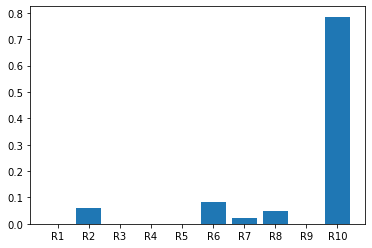

In [6]:
column_names = x_test.columns
col_len = len(x_test.columns)
# Feature importance
print(pd.Series(boost.feature_importances_.reshape(col_len,), index=column_names))
plt.bar(column_names, boost.feature_importances_)

In [7]:
# Metrics for the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_test)
TN = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
TP = cm[1,1]
print(cm)
print("The FNR is:", FN/(TP+FN))
print("The FPR is:",FP/(FP+TN))
print("The MR is:",(FP + FN)/len(y_test))

[[881  49]
 [ 87  71]]
The FNR is: 0.4083333333333333
The FPR is: 0.08987603305785125
The MR is: 0.125


AUC: 0.8799441949094868


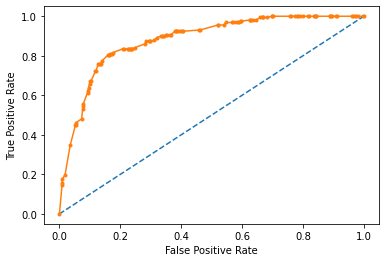

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
pred_test_prob = boost.predict_proba(x_test)
mr_probs = [0 for _ in range(len(y_test))]
mr_fpr, mr_tpr, _ = roc_curve(y_test, mr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred_test_prob[:,1])
plt.plot(mr_fpr, mr_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC:",metrics.auc(lr_fpr, lr_tpr))

# Question 3- trying different number of trees using CV

In [9]:
from sklearn.model_selection import KFold
accuracy = []
cv = KFold(n_splits=5, shuffle=True, random_state=13)
for j in (50,100,200,500,1000,2000):
    boost1 = AdaBoostClassifier(n_estimators=j, algorithm = 'SAMME',random_state=13)
    avg_accuracy = 0
    for train_index, test_index in cv.split(bankruptcy):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        boost1.fit(x_train, y_train)
        pred_test = boost1.predict(x_test)
        temp_accuracy = accuracy_score(pred_test,y_test)
        avg_accuracy = avg_accuracy + temp_accuracy
    avg_accuracy = avg_accuracy/5
    accuracy.append(avg_accuracy)

/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when 

In [10]:
column_names = ["50","100","200","500","1000","2000"]
pd.Series(accuracy, index = column_names)

50      0.875644
100     0.883370
200     0.886313
500     0.887049
1000    0.887233
2000    0.886313
dtype: float64

Text(0, 0.5, 'Accuracy Score')

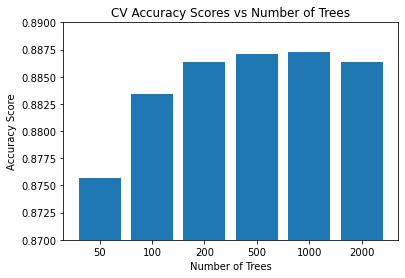

In [11]:
column_names = ["50","100","200","500","1000","2000"]
plt.bar(column_names, accuracy)
plt.ylim(0.87,0.89)
plt.title("CV Accuracy Scores vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy Score")

In [12]:
# 1000 trees is the optimal number
boost1 = AdaBoostClassifier(n_estimators=1000,random_state=13, algorithm = 'SAMME')
boost1.fit(x_train,y_train)
pred_test = boost1.predict(x_test)
print("Test accuracy:",accuracy_score(pred_test,y_test)) 

/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.8886844526218951


In [13]:
# Metrics for the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_test)
TN = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
TP = cm[1,1]
print(cm)
print("The FNR is:", FN/(TP+FN))
print("The FPR is:",FP/(FP+TN))
print("The MR is:",(FP + FN)/len(y_test))

[[897  36]
 [ 85  69]]
The FNR is: 0.34285714285714286
The FPR is: 0.08655804480651731
The MR is: 0.11131554737810488


AUC: 0.8717167077295696


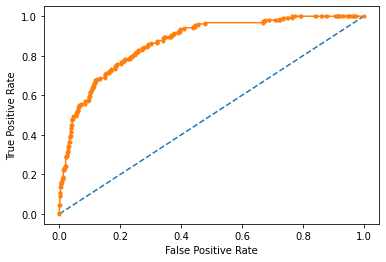

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
pred_test_prob = boost1.predict_proba(x_test)
mr_probs = [0 for _ in range(len(y_test))]
mr_fpr, mr_tpr, _ = roc_curve(y_test, mr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred_test_prob[:,1])
plt.plot(mr_fpr, mr_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC:",metrics.auc(lr_fpr, lr_tpr))

# Bonus Question 4- logistic regression adaboost

In [28]:
from sklearn.linear_model import LogisticRegression
boost_logistic = AdaBoostClassifier(base_estimator = LogisticRegression(),
                                    n_estimators=50,random_state=13, algorithm = 'SAMME')
boost_logistic.fit(x_train,y_train)
pred_test = boost_logistic.predict(x_test)
print("Logistic Boost Test accuracy:",accuracy_score(pred_test,y_test)) 

Logistic Boost Test accuracy: 0.8574057037718491


/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
# Metrics for the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_test)
TN = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
TP = cm[1,1]
print(cm)
print("The FNR is:", FN/(TP+FN))
print("The FPR is:",FP/(FP+TN))
print("The MR is:",(FP + FN)/len(y_test))

[[855  78]
 [ 77  77]]
The FNR is: 0.5032258064516129
The FPR is: 0.08261802575107297
The MR is: 0.14259429622815087


AUC: 0.848860678442672


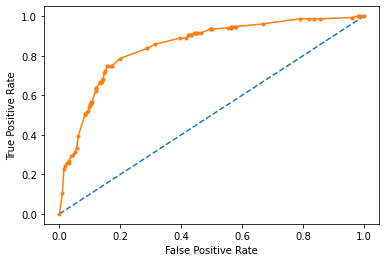

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
pred_test_prob = boost_logistic.predict_proba(x_test)
mr_probs = [0 for _ in range(len(y_test))]
mr_fpr, mr_tpr, _ = roc_curve(y_test, mr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred_test_prob[:,1])
plt.plot(mr_fpr, mr_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC:",metrics.auc(lr_fpr, lr_tpr))

# Question 5- Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

boost2 = GradientBoostingClassifier(n_estimators=50,learning_rate=0.1, max_depth=3, random_state=13)
    # Define the function
    # loss is what you are trying to minimze (default is deciance, used for classification)
    # learning_rate is the regularization, range from 0 to 1, default is 0.1
        ## necessary to use in gradient boosting
    # n_estimator is the number of trees
    
boost2.fit(x_train,y_train)
pred_test = boost2.predict(x_test)
print("Test accuracy:",accuracy_score(pred_test,y_test))

/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.8877644894204232


In [33]:
print(boost2.train_score_) # score of the model for each iteration
    # a score of 0 means it has the best fit

[0.76541628 0.72418904 0.69274592 0.66670995 0.64516905 0.62723927
 0.61220946 0.60038157 0.58893665 0.57916492 0.57035703 0.56020746
 0.5526181  0.54481042 0.53747343 0.53221336 0.5264402  0.52009592
 0.51599404 0.51188044 0.50779917 0.50532195 0.50174279 0.49800335
 0.49476836 0.49348797 0.49027366 0.48623772 0.48442489 0.48057376
 0.4782323  0.47639103 0.47378087 0.47112163 0.46949067 0.46755417
 0.4650823  0.461609   0.45942235 0.45789752 0.45572249 0.45433411
 0.45260342 0.45120392 0.44971954 0.44845135 0.44675665 0.44600659
 0.44481025 0.44416725]


R1     0.016675
R2     0.053438
R3     0.065580
R4     0.092934
R5     0.022565
R6     0.146871
R7     0.013753
R8     0.047150
R9     0.049860
R10    0.491175
dtype: float64


<BarContainer object of 10 artists>

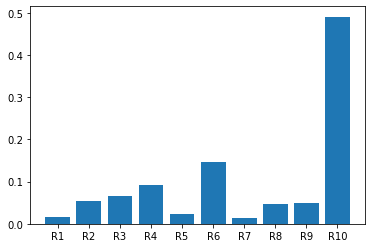

In [34]:
column_names = x_test.columns
col_len = len(x_test.columns)
# Feature importance
print(pd.Series(boost2.feature_importances_.reshape(col_len,), index=column_names))
plt.bar(column_names, boost2.feature_importances_)

In [35]:
# Metrics for the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_test)
TN = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
TP = cm[1,1]
print(cm)
print("The FNR is:", FN/(TP+FN))
print("The FPR is:",FP/(FP+TN))
print("The MR is:",(FP + FN)/len(y_test))

[[895  38]
 [ 84  70]]
The FNR is: 0.35185185185185186
The FPR is: 0.08580183861082738
The MR is: 0.11223551057957681


AUC: 0.8810498183488538


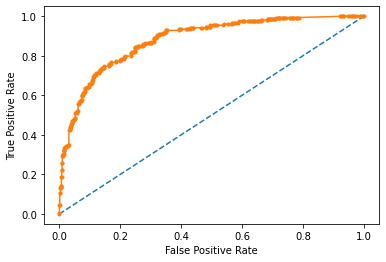

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
pred_test_prob = boost2.predict_proba(x_test)
mr_probs = [0 for _ in range(len(y_test))]
mr_fpr, mr_tpr, _ = roc_curve(y_test, mr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred_test_prob[:,1])
plt.plot(mr_fpr, mr_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC:",metrics.auc(lr_fpr, lr_tpr))

# Question 6- Optimal learning rate using CV

In [37]:
from sklearn.model_selection import KFold
accuracy = []
cv = KFold(n_splits=5, shuffle=True, random_state=13)
for j in (0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1):
    boost3 = GradientBoostingClassifier(n_estimators=50,learning_rate=j, max_depth=3, random_state=13)
    avg_accuracy = 0
    for train_index, test_index in cv.split(bankruptcy):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        boost3.fit(x_train, y_train)
        pred_test = boost3.predict(x_test)
        temp_accuracy = accuracy_score(pred_test,y_test)
        avg_accuracy = avg_accuracy + temp_accuracy
    avg_accuracy = avg_accuracy/5
    accuracy.append(avg_accuracy)

/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expec

In [38]:
column_names = ["0.0001", "0.0005", "0.001", '0.005', '0.01', '0.05', '0.1', '0.5', '1']
pd.Series(accuracy, index = column_names)

0.0001    0.857248
0.0005    0.857248
0.001     0.857248
0.005     0.857248
0.01      0.857248
0.05      0.886498
0.1       0.888521
0.5       0.879691
1         0.869756
dtype: float64

Text(0, 0.5, 'Accuracy Score')

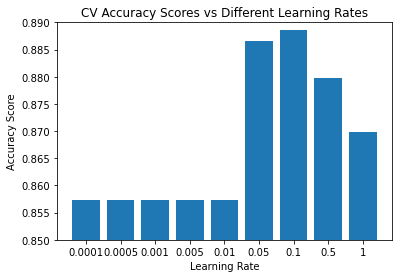

In [39]:
column_names = ["0.0001", "0.0005", "0.001", '0.005', '0.01', '0.05', '0.1', '0.5', '1']
plt.bar(column_names, accuracy)
plt.ylim(0.85,0.89)
plt.title("CV Accuracy Scores vs Different Learning Rates")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy Score")

In [40]:
# The optimal learning rate is 0.1, so this will be used
boost4 = GradientBoostingClassifier(n_estimators=50,learning_rate=0.1, max_depth=3, random_state=13)
boost4.fit(x_train,y_train)
pred_test = boost4.predict(x_test)
print("Test accuracy:",accuracy_score(pred_test,y_test))

/Users/brandonk87/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.8877644894204232


In [41]:
# Metrics for the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_test)
TN = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
TP = cm[1,1]
print(cm)
print("The FNR is:", FN/(TP+FN))
print("The FPR is:",FP/(FP+TN))
print("The MR is:",(FP + FN)/len(y_test))

[[895  38]
 [ 84  70]]
The FNR is: 0.35185185185185186
The FPR is: 0.08580183861082738
The MR is: 0.11223551057957681


AUC: 0.8810498183488538


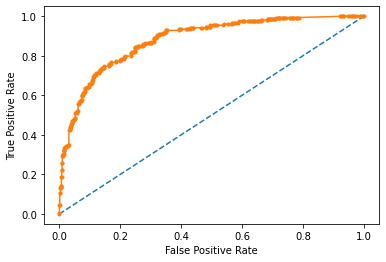

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
pred_test_prob = boost4.predict_proba(x_test)
mr_probs = [0 for _ in range(len(y_test))]
mr_fpr, mr_tpr, _ = roc_curve(y_test, mr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred_test_prob[:,1])
plt.plot(mr_fpr, mr_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC:",metrics.auc(lr_fpr, lr_tpr))